This is being used to visualize relationships between features

In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
pkl_file = open('../data/df.pkl', 'rb')
df = pickle.load(pkl_file)
pkl_file.close() 

In [209]:
df.columns

Index(['trail_name', 'top_elev_(ft)', 'bottom_elev_(ft)', 'vert_rise_(ft)',
       'slope_length_(ft)', 'avg_width_(ft)', 'slope_area_(acres)',
       'avg_grade_(%)', 'max_grade_(%)', 'ability_level', 'resort', 'location',
       'groomed', 'colors', 'ability_nums', 'color_nums'],
      dtype='object')

In [210]:
colors = ['k','r','chartreuse','seagreen','paleturquoise','deepskyblue','blue','darkorchid','plum','mediumvioletred','gold','orange']

In [211]:
c = dict(zip(list(df['resort'].unique()),colors))
c

{'Alpine Meadows': 'paleturquoise',
 'Arapahoe Basin': 'r',
 'Beaver Creek': 'orange',
 'Copper': 'chartreuse',
 'Crested Butte': 'darkorchid',
 'Diamond Peak': 'mediumvioletred',
 'Eldora': 'seagreen',
 'Loveland': 'k',
 'Monarch': 'blue',
 'Taos': 'plum',
 'Vail': 'deepskyblue',
 'Winter Park': 'gold'}

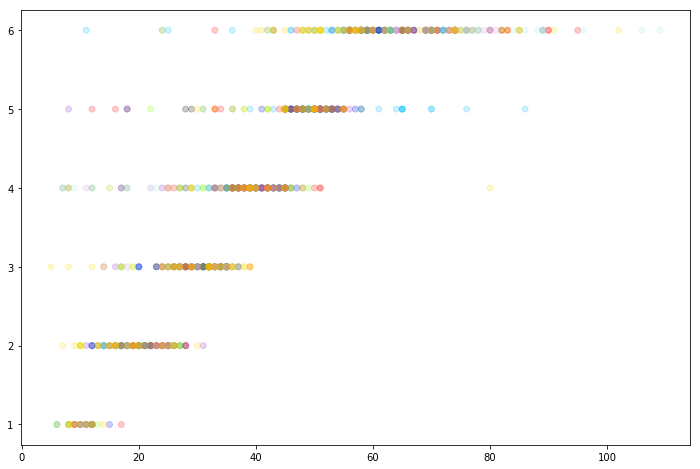

In [212]:
plt.figure(figsize=(12,8))
plt.scatter(df['max_grade_(%)'][df['max_grade_(%)'] < 200],df['ability_nums'][df['max_grade_(%)'] < 200],
            c=[c[x] for x in df['resort']],alpha=.2);

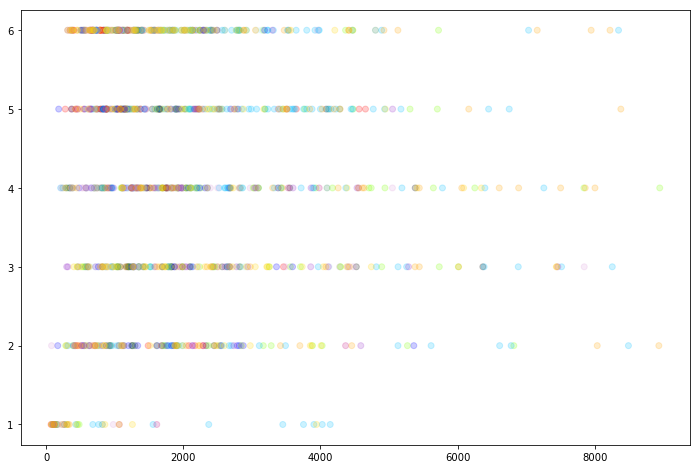

In [213]:
plt.figure(figsize=(12,8))
plt.scatter(df['slope_length_(ft)'][df['slope_length_(ft)'] < 10000],df['ability_nums'][df['slope_length_(ft)'] < 10000],
            c=[c[x] for x in df['resort']],alpha=.2);

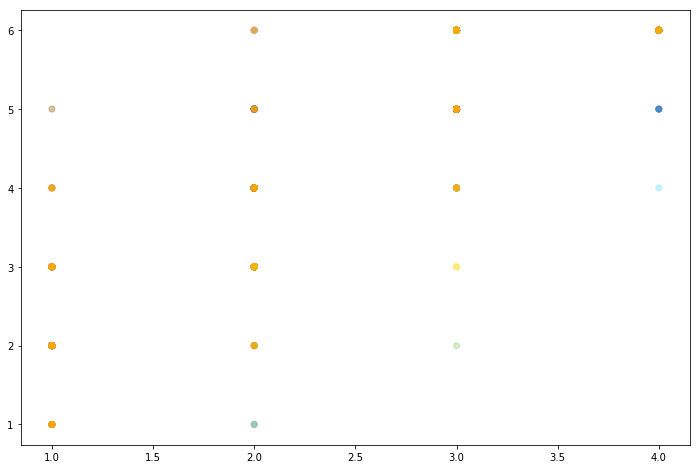

In [214]:
plt.figure(figsize=(12,8))
plt.scatter(df['color_nums'],df['ability_nums'],
            c=[c[x] for x in df['resort']],alpha=.2);

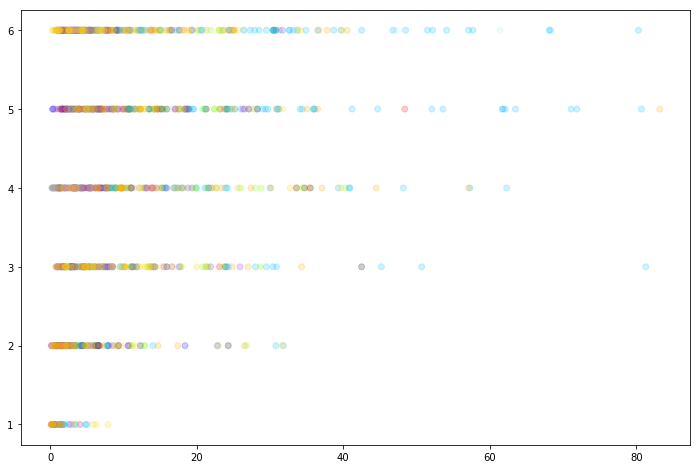

In [215]:
plt.figure(figsize=(12,8))
plt.scatter(df['slope_area_(acres)'][df['slope_area_(acres)'] < 100],df['ability_nums'][df['slope_area_(acres)'] < 100],
            c=[c[x] for x in df['resort']],alpha=.2);

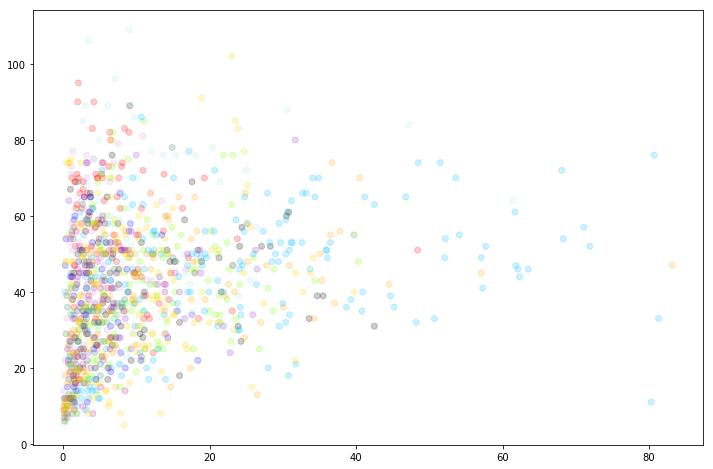

In [216]:
plt.figure(figsize=(12,8))
plt.scatter(df['slope_area_(acres)'][(df['slope_area_(acres)'] < 100)&(df['max_grade_(%)'] < 200)],
            df['max_grade_(%)'][(df['slope_area_(acres)'] < 100)&(df['max_grade_(%)'] < 200)],
            c=[c[x] for x in df['resort']],alpha=.2);

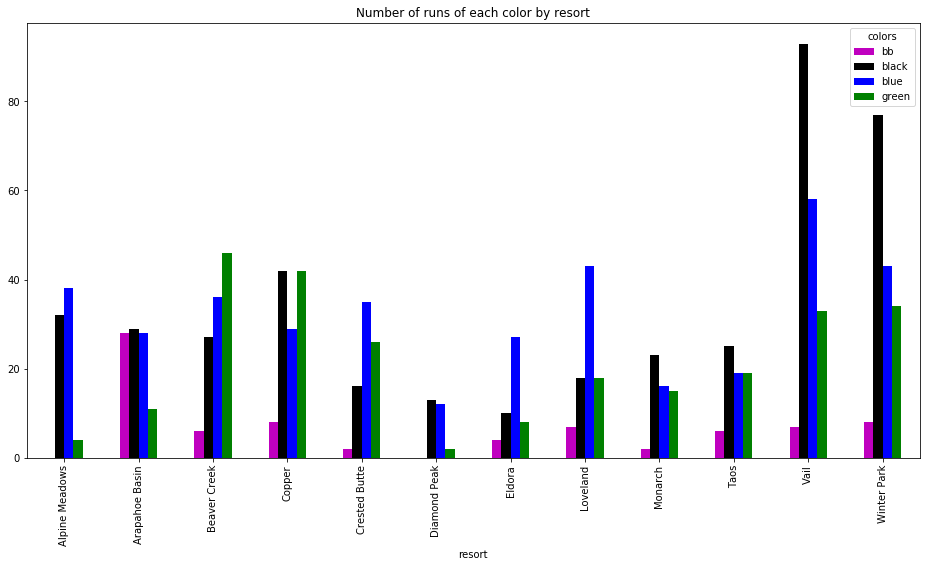

In [217]:
df.groupby(['resort','colors']).size().unstack().plot(kind='bar',figsize = (16,8), color = ['m','k','b','g'], 
                                                      title = 'Number of runs of each color by resort');

In [218]:
df.groupby(['resort','colors']).size().unstack().fillna(0);

In [219]:
df_pct = df.groupby(['resort','colors']).size().unstack().fillna(0).copy()
df_pct['total'] = df_pct.sum(axis=1)
for col in df_pct.columns[:-1]:
    df_pct[col] = (df_pct[col]/df_pct['total'])*100
df_pct = df_pct.drop('total',axis=1)

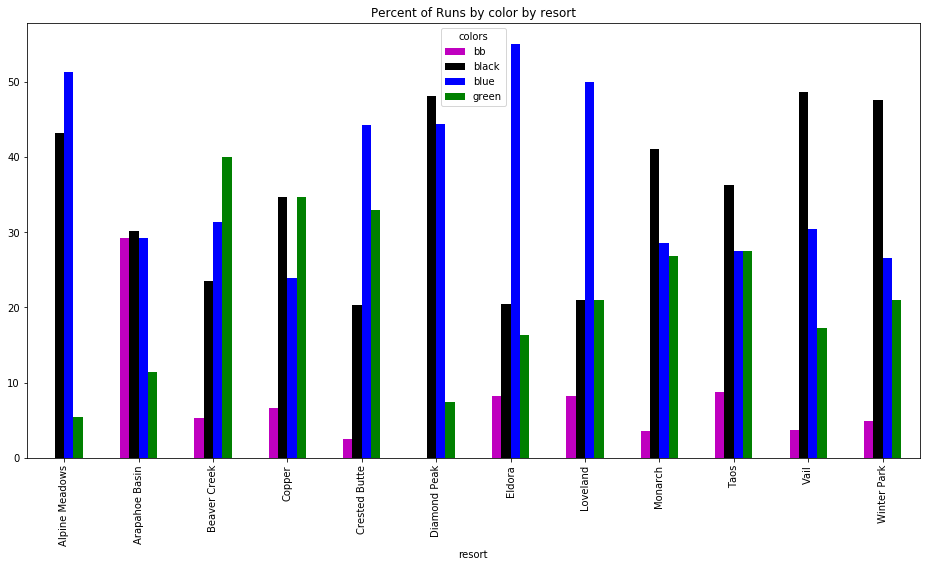

In [220]:
df_pct.plot(kind='bar',figsize=(16,8),color=['m','k','b','g'], title='Percent of Runs by color by resort');

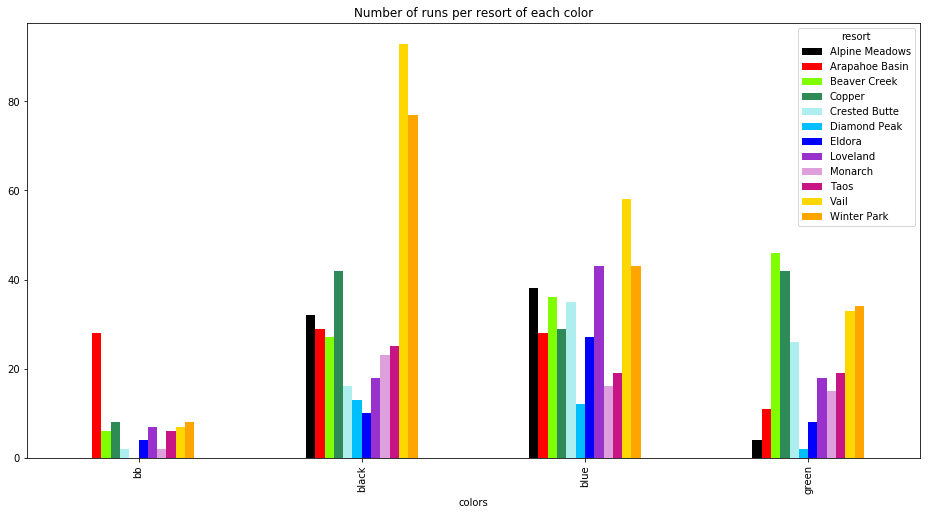

In [223]:
df.groupby(['colors','resort']).size().unstack().plot(kind='bar',figsize = (16,8), color = colors, 
                                                      title='Number of runs per resort of each color');

In [222]:
df_pct2 = df.groupby(['colors','resort']).size().unstack().fillna(0).copy()
df_pct2['total'] = df_pct2.sum(axis=1)
for col in df_pct2.columns[:-1]:
    df_pct2[col] = (df_pct2[col]/df_pct2['total'])*100
df_pct2 = df_pct2.drop('total',axis=1)

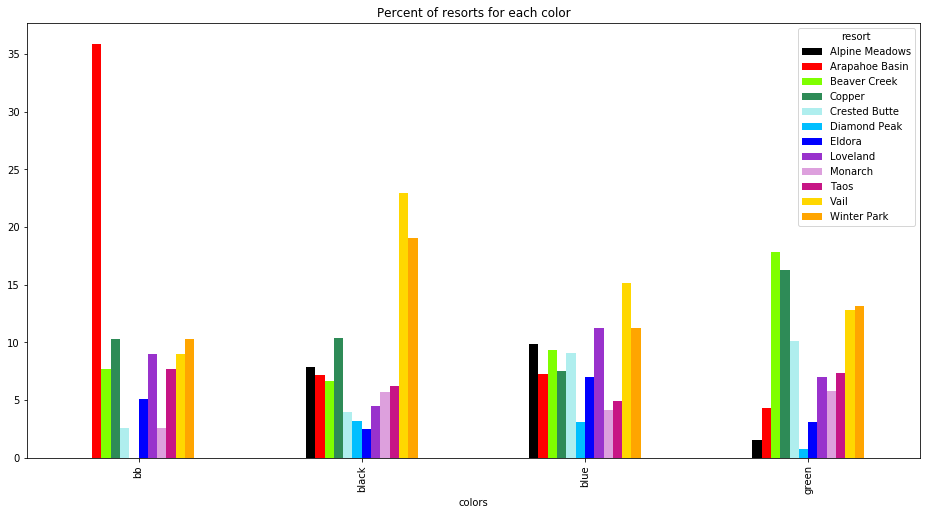

In [188]:
df_pct2.plot(kind='bar',figsize=(16,8),color=colors, title='Percent of resorts for each color');

In [202]:
df[['trail_name','resort','ability_level','colors']][abs(df['ability_nums']/6 - df['color_nums']/4 > .5)]

,trail_name,resort,ability_level,colors
73,Creek Trail,Loveland,Advanced,green
1086,Bedstraw,Beaver Creek,Advanced,green


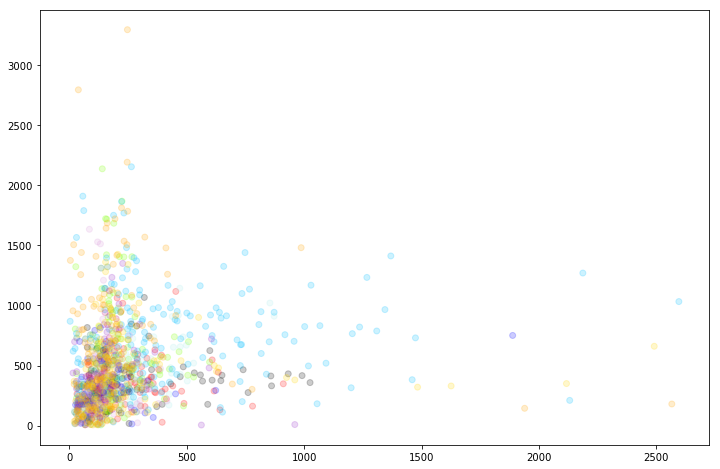

In [225]:
plt.figure(figsize=(12,8))
plt.scatter(df['avg_width_(ft)'],df['vert_rise_(ft)'],c=[c[x] for x in df['resort']],alpha=.2);

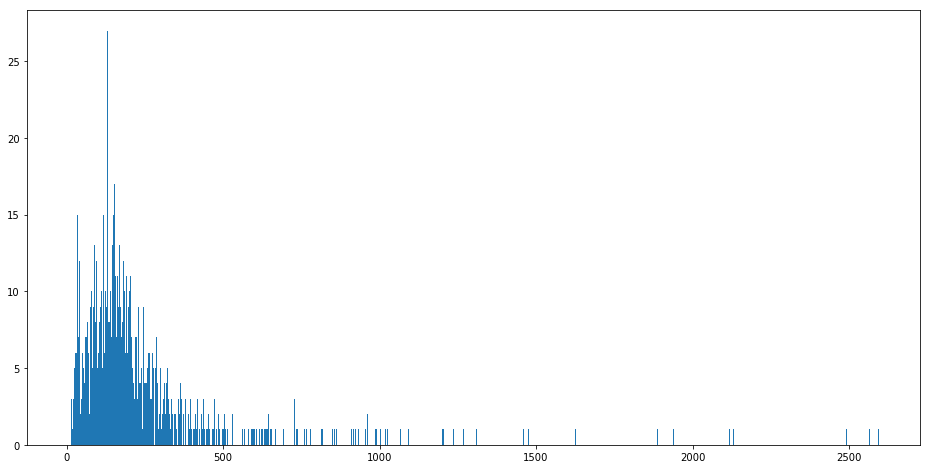

In [235]:
plt.figure(figsize=(16,8))
plt.hist(df['avg_width_(ft)'], bins=1125);

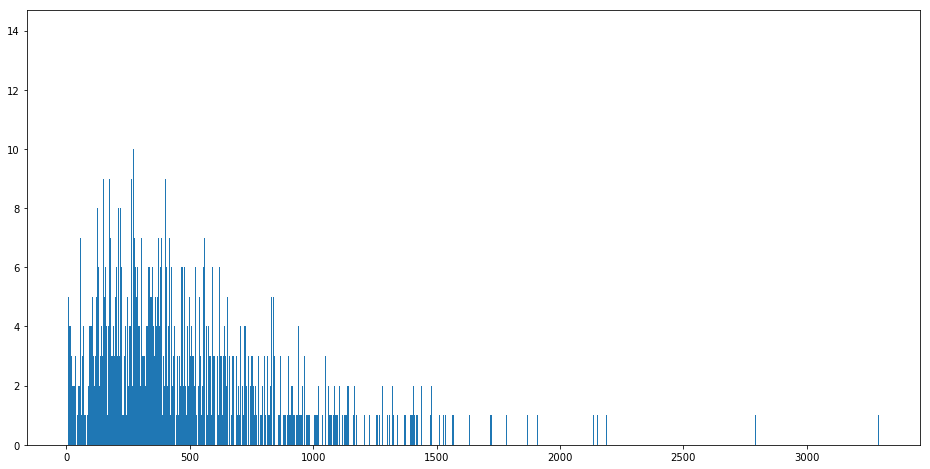

In [234]:
plt.figure(figsize=(16,8))
plt.hist(df['vert_rise_(ft)'], bins=1125);

In [236]:
df[df['vert_rise_(ft)'] > 3000]

,trail_name,top_elev_(ft),bottom_elev_(ft),vert_rise_(ft),slope_length_(ft),avg_width_(ft),slope_area_(acres),avg_grade_(%),max_grade_(%),ability_level,resort,location,groomed,colors,ability_nums,color_nums
1050,Centennial,11433.0,8139.0,3293.0,14644.0,247.0,83.2,23.0,47.0,Advanced,Beaver Creek,CO,1,black,5,3
